### 【AIコース】教師なし学習　クラスタリング４（演習）ー課題

### 演習の回答

8系統に分類した

### 根拠

決定的な根拠は，セル4の系統樹木図が8系統になったことと，セル12の決定木のツリー図でサンプルが1つの系統があったため，実質的に8系統であったことです。

弱い根拠として，セル13, 14, 15 のシルエットで，8系統が6系統と10系統に比較して凸凹が少し小さかったからです。

また，セル７で完全連結法の，セル9でk-meansの８系統に分割した散布図を描きましたが，それなりに傾向がでていたようです。

根拠とできなかったのが，セル3で8系統のところでエルボーにならなかったことです。

### Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X_data, y_data = make_blobs(n_samples=100, 
                            n_features=20, 
                            centers=15, 
                            cluster_std=2.0, 
                            shuffle=True, 
                            random_state=0)

variables = ['辛さ','重厚','スパイシー','果実味','コク','酸味','落ち着き',
             '香り','華やか','ジューシー','熟成','透明感','シャープ','力強い',
             'フレッシュ','渋み','苦味','樽','エキゾチック','粘性']
# variables = np.arange(20)

name = list(map(str,[i for i in range(100)]))
df = pd.DataFrame(X_data, columns=variables, index=name)
df.sample(10)

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
89,-3.869887,-1.097238,-11.458570,5.580748,3.494781,-5.954962,-0.017715,-9.877570,2.917691,6.463479,-4.073575,1.630368,-7.262134,0.738086,-1.558955,-8.265386,1.850048,-10.022895,5.054572,-11.681651
95,-1.662716,3.775320,-0.595631,5.568469,-6.114115,11.894343,5.618125,-8.472857,10.685424,4.985479,-5.604523,-5.685179,2.923638,-11.258679,-5.048827,-1.525605,-6.110930,-2.332998,-4.060999,4.330371
23,-2.040650,0.832729,8.057376,8.200923,9.895888,8.508944,-9.089267,-1.496876,4.602753,-8.100816,-1.587913,-10.909624,-8.746155,-11.765048,9.396486,-4.013315,-4.343021,7.780840,4.313403,-10.674311
45,-4.808838,5.219757,1.757521,-7.984245,-2.550788,-2.465980,10.388443,-2.259783,1.567309,4.949313,-0.439974,-9.450476,6.147080,-3.939418,-3.143078,-6.512493,-10.896986,5.378690,7.433475,11.717833
43,-6.799910,-6.352430,-0.521922,-6.629133,-4.522963,-5.948693,7.316255,-4.665611,6.729183,-6.435220,10.870330,-2.041987,9.614755,-1.037079,3.882666,-8.684868,-2.897660,-7.546845,-2.637229,-9.831258
2,0.246883,4.617195,3.212311,1.596973,-3.055192,0.042299,1.480808,6.456562,7.968668,-3.373548,2.148362,-0.378050,0.401580,9.752649,-7.182365,-8.249872,-7.731935,7.332327,5.531771,7.722099
56,7.601345,3.039501,2.525857,5.939039,-6.499931,2.353070,-7.839798,5.660430,-0.146708,-3.229746,-2.993040,7.766878,2.056164,3.073783,-10.821512,0.120916,3.775241,3.051266,5.337885,4.347370
93,9.191060,5.193472,-1.305880,3.354561,-7.073628,0.812173,-5.449672,8.394461,0.535956,-0.719088,-3.422259,2.343427,-1.290801,3.129037,-13.020416,3.127271,-2.269214,0.293666,8.952223,0.322976
47,-6.796343,2.587811,3.245633,-6.920392,6.660732,2.449255,-2.500223,-0.947908,8.335807,-2.246163,-2.055692,-3.327111,-8.357338,8.256242,6.037923,1.590520,-4.425874,-9.995348,-10.775581,-0.357531
80,3.295454,-0.945566,3.395873,9.413602,10.338613,6.101598,-9.456381,-0.717302,4.521275,-8.465272,0.684556,-12.874371,-4.462528,-10.472219,4.935333,-3.770115,-5.823292,12.455823,3.127804,-10.409723


In [2]:
df.describe()

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.543841,-0.011124,0.540212,0.852497,-0.574157,1.000479,-1.362024,-1.010469,1.605142,0.916961,0.523540,-0.100719,-0.116344,-0.271427,-1.640929,-2.161169,-0.234550,0.426216,2.103621,-0.823097
std,5.593704,5.021579,5.639676,7.185475,6.411257,4.959201,5.817630,6.290665,5.377922,6.007130,5.616616,5.982827,6.532491,7.027005,6.888048,5.807407,5.749898,5.839218,5.858236,6.830147
min,-8.686186,-11.014254,-13.063670,-14.887777,-12.715902,-9.252527,-12.893751,-12.215837,-8.547990,-12.568675,-12.565752,-12.874371,-11.604475,-12.914838,-13.020416,-11.742381,-10.979732,-10.780215,-11.935925,-13.294555
25%,-4.144940,-4.161809,-1.940475,-6.504940,-6.199207,-2.837972,-6.156073,-6.055951,-2.176886,-3.142244,-3.544418,-4.848950,-6.425292,-5.452595,-7.773425,-7.016971,-4.479033,-4.272937,-2.294885,-7.107632
50%,-0.842533,0.273704,0.802255,2.806971,-1.140522,1.905987,-0.691345,-1.003881,2.587896,-0.381474,-0.524481,-0.774824,-0.021912,0.117478,-1.851731,-2.394550,0.200719,1.460861,3.188114,-0.918579
75%,4.671538,4.282958,4.023140,7.269132,5.470677,4.484186,2.497944,3.670860,6.081132,6.409004,3.762367,5.362814,5.215765,4.962987,5.003856,2.230358,4.393867,4.472158,6.930322,4.694783
max,12.599023,9.682862,11.656496,12.186415,11.283413,12.401938,13.428952,11.863202,11.753299,12.581836,12.352950,10.523927,12.381189,12.640918,10.855463,10.313500,10.779629,12.455823,11.473295,11.717833


### KMeans Elbow

エルボーは明確にならなかった

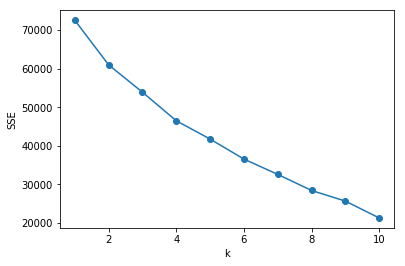

In [3]:
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10, 
                max_iter=300, 
                tol=1e-04, 
                random_state=0,
                n_jobs=-1
               )
    km.fit(X_data)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

### 完全連結法に基づく凝集型階層的クラスタリング

### dendrogram & heatmap

8系統に分類された

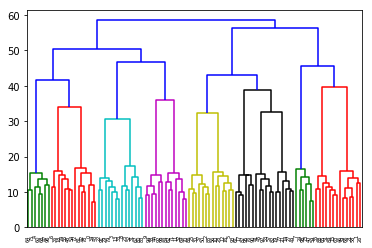

In [4]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

row_clusters = linkage(pdist(df, metric='euclidean'), 
                       method='complete')

row_dender = dendrogram(row_clusters, 
                        labels=name)
plt.show()

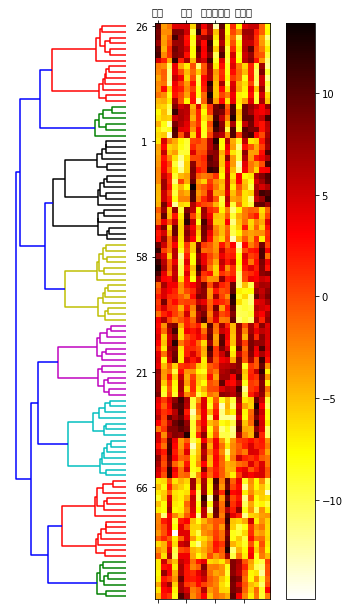

In [5]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 1.0])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.1, 0.1, 0.55, 1.0])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('./figures/heatmap.png', dpi=300)
plt.show()

### AgglomerativeClustering

n_clusters=8, affinity='euclidean', 'linkage='complete

8系統に分類してみる

In [6]:
from sklearn.cluster import AgglomerativeClustering
complete = AgglomerativeClustering(n_clusters=8, 
                                   affinity='euclidean', 
                                   linkage='complete')

y_pred = complete.fit_predict(X_data)

# print('Cluster labels:' + str(name))

### 科学的に計測できそうな「酸味」特徴量#5「香り」特徴量#7で散布図

多少なりとも傾向がありそうです

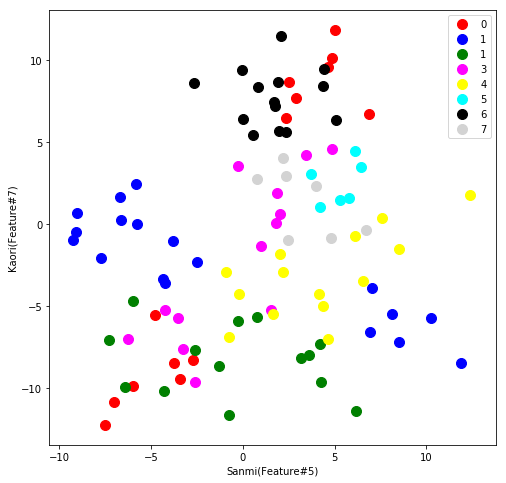

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.scatter(X_data[y_pred == 0, 5], X_data[y_pred == 0, 7], s = 100, c = 'red', label = '0')
plt.scatter(X_data[y_pred == 1, 5], X_data[y_pred == 1, 7], s = 100, c = 'blue', label = '1')
plt.scatter(X_data[y_pred == 2, 5], X_data[y_pred == 2, 7], s = 100, c = 'green', label = '1')
plt.scatter(X_data[y_pred == 3, 5], X_data[y_pred == 3, 7], s = 100, c = 'magenta', label = '3')
plt.scatter(X_data[y_pred == 4, 5], X_data[y_pred == 4, 7], s = 100, c = 'yellow', label = '4')
plt.scatter(X_data[y_pred == 5, 5], X_data[y_pred == 5, 7], s = 100, c = 'cyan', label = '5')
plt.scatter(X_data[y_pred == 6, 5], X_data[y_pred == 6, 7], s = 100, c = 'black', label = '6')
plt.scatter(X_data[y_pred == 7, 5], X_data[y_pred == 7, 7], s = 100, c = 'lightgrey', label = '7')

plt.xlabel("Sanmi(Feature#5)")
plt.ylabel("Kaori(Feature#7)")
plt.legend()
plt.show()

### 上と同じことを Kmeans でやってみる

Centroids もプロットする

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8, 
            init='random', 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0)

y_pred = km.fit_predict(X_data)

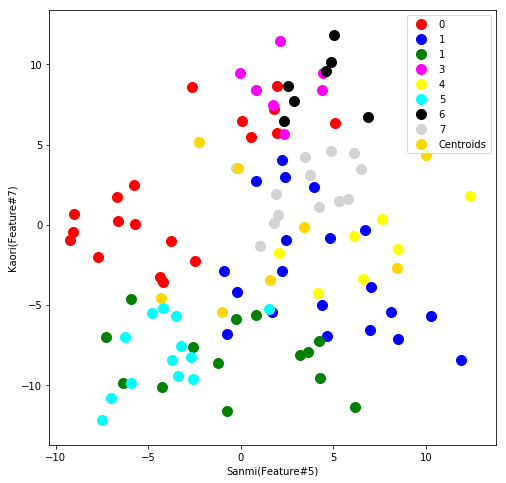

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.scatter(X_data[y_pred == 0, 5], X_data[y_pred == 0, 7], s = 100, c = 'red', label = '0')
plt.scatter(X_data[y_pred == 1, 5], X_data[y_pred == 1, 7], s = 100, c = 'blue', label = '1')
plt.scatter(X_data[y_pred == 2, 5], X_data[y_pred == 2, 7], s = 100, c = 'green', label = '1')
plt.scatter(X_data[y_pred == 3, 5], X_data[y_pred == 3, 7], s = 100, c = 'magenta', label = '3')
plt.scatter(X_data[y_pred == 4, 5], X_data[y_pred == 4, 7], s = 100, c = 'yellow', label = '4')
plt.scatter(X_data[y_pred == 5, 5], X_data[y_pred == 5, 7], s = 100, c = 'cyan', label = '5')
plt.scatter(X_data[y_pred == 6, 5], X_data[y_pred == 6, 7], s = 100, c = 'black', label = '6')
plt.scatter(X_data[y_pred == 7, 5], X_data[y_pred == 7, 7], s = 100, c = 'lightgrey', label = '7')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'gold', label = 'Centroids')

plt.xlabel("Sanmi(Feature#5)")
plt.ylabel("Kaori(Feature#7)")
plt.legend()
plt.show()

### 決定木のツリー図

9系統に分類できたが，サンプルが1つの系統はその上の系統に統合して，8系統としたほうがよい

In [10]:
variables = np.arange(20)
# df.sample(10)

In [11]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)

clf = clf.fit(X_data, y_pred)
 
# graphvizのdotファイルを生成する
with open("wine_tree.dot", 'w') as f:
    tree.export_graphviz(clf,
                         out_file=f,
                         feature_names=variables,
                         class_names=name,
                         filled=True,
                         rounded=True,  
                         special_characters=True,
                         impurity=False,
                         proportion=False,
                        )

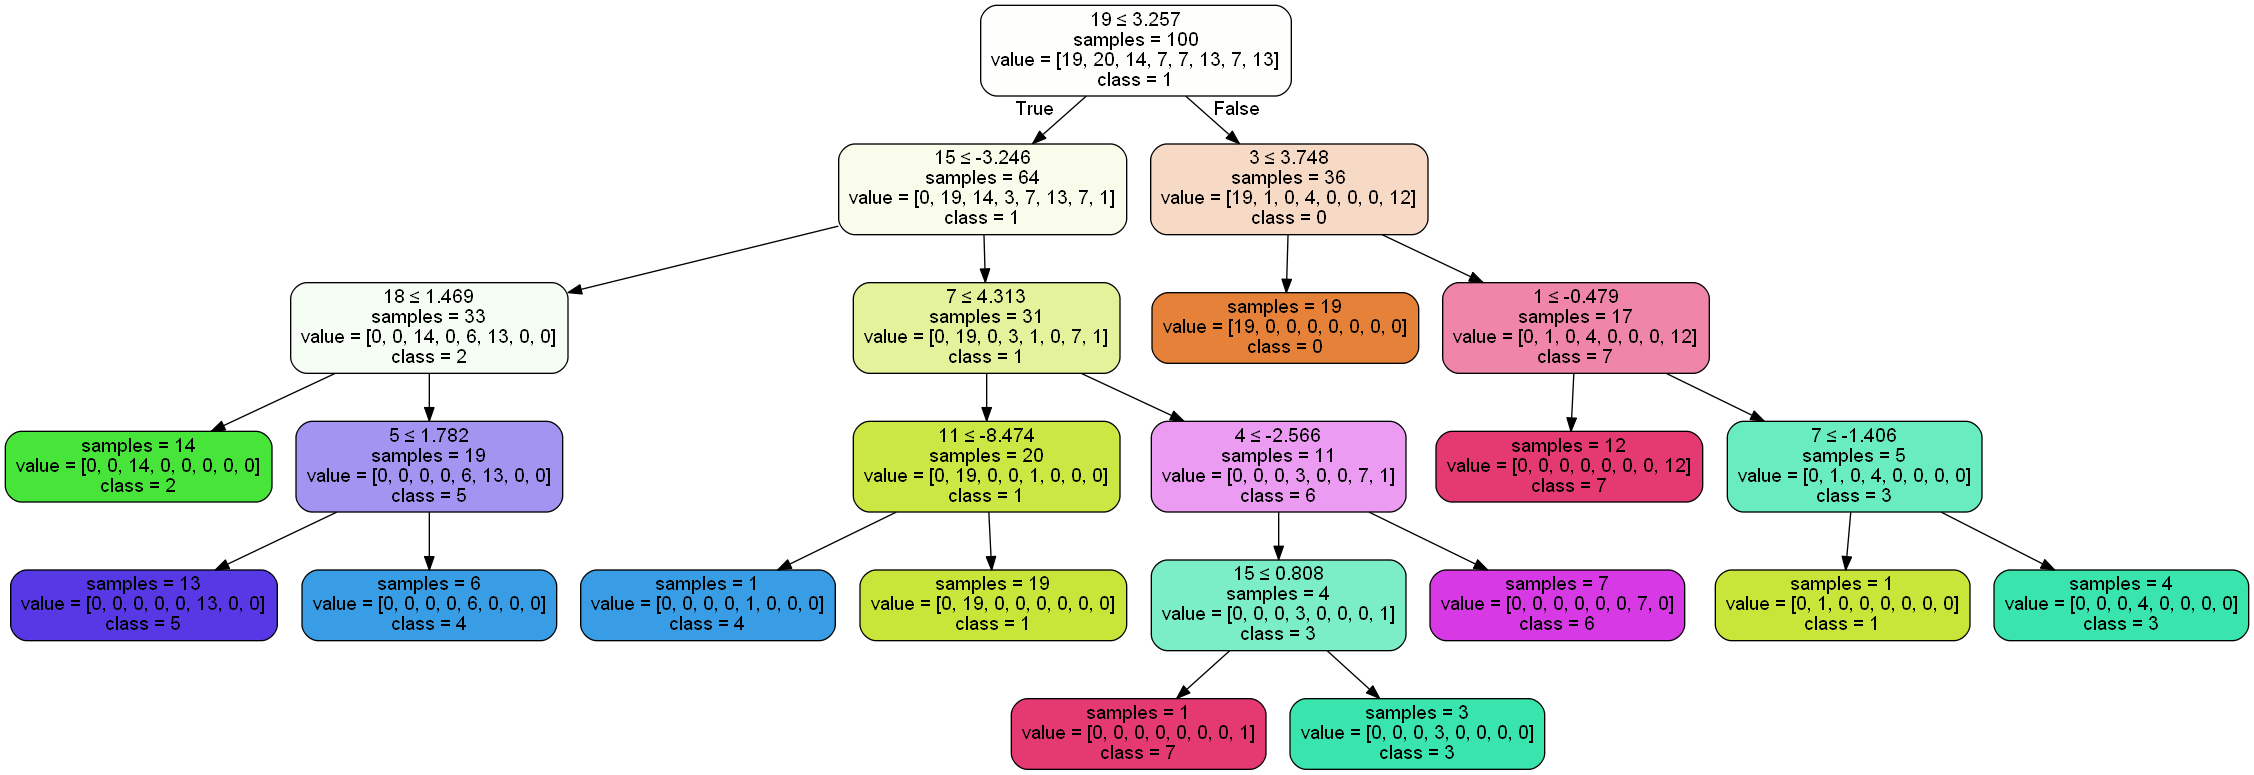

In [12]:
import pydotplus
from IPython.display import Image
 
graph = pydotplus.graphviz.graph_from_dot_file('wine_tree.dot')
graph.write_png('wine_tree.png')
Image(graph.create_png())

### Silhouette

n_clusters=6, 8, 10

明確ではないが，8系統が最も凸凹が小さい

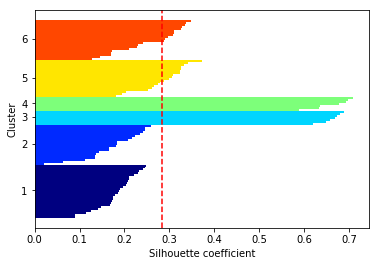

In [13]:
km = KMeans(n_clusters=6, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X_data)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_data, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

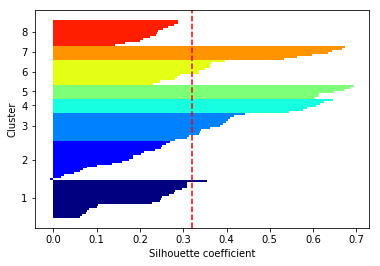

In [14]:
km = KMeans(n_clusters=8, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X_data)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_data, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

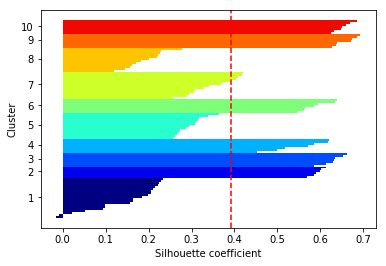

In [15]:
km = KMeans(n_clusters=10, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X_data)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_data, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()